# Predict the Price of Books

[Dataset](https://www.machinehack.com/course/predict-the-price-of-books/)

“The so-called paradoxes of an author, to which a reader takes exception, often exist not in the author’s book at all, but rather in the reader’s head.” – Friedrich Nietzsche

Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else.

Here we explore a big database of books. Books of different genres, from thousands of authors. In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features.

Size of training set: 6237 records

Size of test set: 1560 records

__FEATURES:__

    Title         : The title of the book
    Author        : The author(s) of the book.
    Edition       : The edition of the book eg (Paperback,– Import, 26 Apr 2018)
    Reviews       : The customer reviews about the book
    Ratings       : The customer ratings of the book
    Synopsis      : The synopsis of the book
    Genre         : The genre the book belongs to
    BookCategory  : The department the book is usually available at.
    Price         : The price of the book (Target variable)

In [898]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler

import requests
from bs4 import BeautifulSoup
from time import sleep

In [899]:
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")
train['split_source'] = 0
test['split_source'] = 1
df = train.append(test, sort=False)

In [900]:
train.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'split_source'],
      dtype='object')

In [901]:
test.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'split_source'],
      dtype='object')

In [902]:
print("Train Shape:",train.shape)
print("Test Shape:",test.shape)
print("Combined DF Shape:",df.shape)

Train Shape: (6237, 10)
Test Shape: (1560, 9)
Combined DF Shape: (7797, 10)


In [903]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,split_source
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,0


In [904]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,split_source
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",1
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",1
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,1
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",1
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",1


In [905]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,split_source
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,0


In [906]:
df.rename(columns={"Ratings":"Reviews", "Reviews":"Ratings"}, inplace=True)

In [907]:
df.describe(include='O')

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory
count,7797,7797,7797,7797,7797,7797,7797,7797
unique,6787,4372,3882,36,368,6771,363,11
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure
freq,4,87,60,1751,1328,8,1183,1036


In [908]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 10 columns):
Title           object
Author          object
Edition         object
Ratings         object
Reviews         object
Synopsis        object
Genre           object
BookCategory    object
Price           float64
split_source    int64
dtypes: float64(1), int64(1), object(8)
memory usage: 670.1+ KB


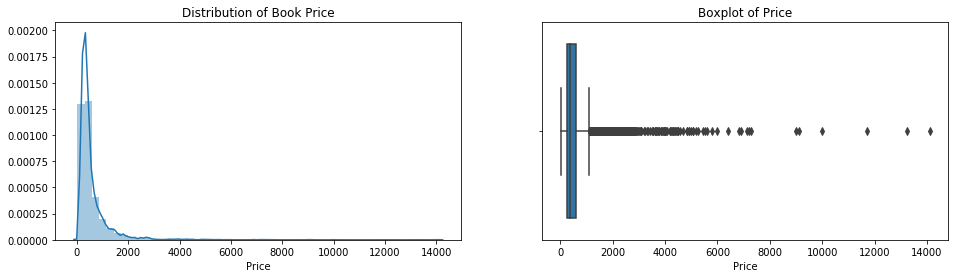

In [909]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(train['Price'])
plt.title("Distribution of Book Price")
plt.subplot(1,2, 2)
sns.boxplot(train['Price'], orient='h')
plt.title("Boxplot of Price")
plt.show()

In [910]:
print("Maximum Book Price:",df['Price'].max())
print("Minimum Book Price:",df['Price'].min())
df.describe().T

Maximum Book Price: 14100.0
Minimum Book Price: 25.0


,count,mean,std,min,25%,50%,75%,max
Price,6237.0,560.707516,690.110657,25.0,249.18,373.0,599.0,14100.0
split_source,7797.0,0.200077,0.400083,0.0,0.00,0.0,0.0,1.0


In [911]:
print("Skewness of Price:",train['Price'].skew())
print("Kurtosis of Price:",train['Price'].kurt())

Skewness of Price: 6.749865573718627
Kurtosis of Price: 80.8434519609723


In [912]:
# Log transform will highly reduce the skewness and kurtosis
print("Skewness of Price:",np.log(train['Price']).skew())
print("Kurtosis of Price:",np.log(train['Price']).kurt())

Skewness of Price: 0.42013939835002867
Kurtosis of Price: 1.0255281772986429


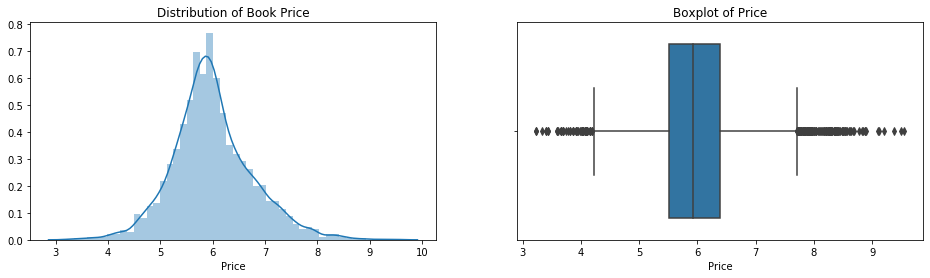

In [913]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(np.log(train['Price']))
plt.title("Distribution of Book Price")
plt.subplot(1,2, 2)
sns.boxplot(np.log(train['Price']), orient='h')
plt.title("Boxplot of Price")
plt.show()

In [914]:
df['Edition'].unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Hardcover,– 11 Apr 2017',
       'Paperback,– 2 Jul 1999', 'Paperback,– 16 Sep 2016'], dtype=object)

In [915]:
edition_clean_1 = df['Edition'].str.split(",–", expand=True).reset_index(drop=True)
edition_clean_1.head()

,0,1
0,Paperback,10 Mar 2016
1,Paperback,7 Nov 2012
2,Paperback,25 Feb 1982
3,Paperback,5 Oct 2017
4,Hardcover,10 Oct 2006


In [916]:
edition_clean_2 = edition_clean_1[1].str.split(',', expand=True)
edition_clean_2.head()

,0,1,2
0,10 Mar 2016,None,None
1,7 Nov 2012,None,None
2,25 Feb 1982,None,None
3,5 Oct 2017,None,None
4,10 Oct 2006,None,None


In [917]:
#edition_clean_2[edition_clean_2[2].notnull()][2].unique()
words_2 = [' Box set', ' Large Print', ' Audiobook']

In [918]:
add_query = edition_clean_2[edition_clean_2[2].isin(words_2)]
add_result = (add_query[1] + add_query[2]).reset_index()
for i in add_result.values:
    edition_clean_2.iloc[i[0], 1] = i[1]

In [919]:
edition_clean_2.drop(2, axis=1, inplace=True)

In [920]:
#sorted(list(edition_clean_2[edition_clean_2[1].notnull()][1].unique()), reverse=True)
words_1 = [' Audiobook Box set',' Audiobook Large Print',' Box set Large Print',' Facsimile',' Illustrated',
           ' Illustrated Large Print',' Import',' Large Print',' Large Print Audiobook',' NTSC',' Special Edition',
           ' Unabridged']

In [921]:
add_query = edition_clean_2[edition_clean_2[1].isin(words_1)]
add_result = (add_query[0] + add_query[1]).reset_index()
for i in add_result.values:
    edition_clean_2.iloc[i[0], 1] = i[1]

In [922]:
#sorted(list(edition_clean_2[edition_clean_2[0].notnull()][0].unique()), reverse=True)
words_0 = [' ADPCM', ' Abridged', ' Audiobook', ' Bargain Price', ' Box set', ' DVD', ' Deckle Edge',
           ' Deluxe Edition', ' EveryBook', ' Facsimile', ' Illustrated', ' Import', ' International Edition',
           ' Kindle eBook', ' Large Print', ' Print', ' Special Edition', ' Student Edition', ' Unabridged']

In [923]:
#sorted(list(edition_clean_2[edition_clean_2[1].notnull()][1].unique()), reverse=True)
words_1_1 = [' Abridged Audiobook Box set',' Abridged Audiobook Large Print',' Abridged Import',
             ' Audiobook Box set Large Print',' Audiobook Illustrated Large Print',' Audiobook Unabridged',
             ' DVD NTSC',' Facsimile Import',' Illustrated Import',' Illustrated Large Print',
             ' Illustrated Large Print Audiobook',' Import Facsimile',' Import Illustrated',' Large Print Import',
             ' Student Edition Special Edition']

In [924]:
indexes_1 = edition_clean_2[edition_clean_2[1].isin(words_1_1)].index

In [925]:
op_query = edition_clean_2[~edition_clean_2[1].index.isin(indexes_1) & edition_clean_2[0].isin(words_0)].reset_index()
for i in op_query.values:
    edition_clean_2.iloc[i[0], 0], edition_clean_2.iloc[i[0], 1] = i[2], i[1]

In [926]:
for word in words_0:
    edition_clean_2[0].replace(word, np.NaN, inplace=True)

In [927]:
edition_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 2 columns):
0    object
1    object
dtypes: object(2)
memory usage: 122.0+ KB


In [928]:
edition_clean_2.rename(columns={0:"Edition_Date", 1:"Edition_Desc"}, inplace=True)

In [929]:
cleaned_edition = pd.concat([edition_clean_1,edition_clean_2], axis=1)
cleaned_edition.rename(columns={0:"Book_Type"}, inplace=True)
cleaned_edition.drop(1, axis=1, inplace=True)

In [930]:
df_indexes = df.index
cleaned_edition.set_index(df_indexes, inplace=True)

In [931]:
cleaned_edition.head()

,Book_Type,Edition_Date,Edition_Desc
0,Paperback,10 Mar 2016,None
1,Paperback,7 Nov 2012,None
2,Paperback,25 Feb 1982,None
3,Paperback,5 Oct 2017,None
4,Hardcover,10 Oct 2006,None


In [932]:
df = pd.concat([df, cleaned_edition], axis=1)

In [933]:
df[df.Edition_Date.isnull()].head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,split_source,Book_Type,Edition_Date,Edition_Desc
169,Long Walk to Freedom: Illustrated Children's e...,Nelson Mandela,"Paperback,– Abridged, Import",5.0 out of 5 stars,2 customer reviews,Long Walk to Freedom by Nelson Mandela is the ...,Action & Adventure (Books),Action & Adventure,418.0,0,Paperback,NaN,Abridged Import
235,Alfred's Basic Adult All-in-One Course: Lesson...,Willard A. Palmer,"Plastic Comb,– DVD, NTSC",3.9 out of 5 stars,6 customer reviews,Alfred's Basic Adult All-in-One Course is a gr...,Music Books,"Arts, Film & Photography",1453.0,0,Plastic Comb,NaN,DVD NTSC
582,Fundamentals of Drawing Portraits: A Practical...,Barrington Barber,"Paperback,– Illustrated, Import",4.0 out of 5 stars,7 customer reviews,This book is essential for everyone who wants ...,"Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",415.0,0,Paperback,NaN,Illustrated Import
972,"Cartooning, The Professional Step-by-Step Guid...","Ivan Hissey, Curtis Tappenden","Paperback,– Illustrated, Import",3.0 out of 5 stars,1 customer review,A comprehensive and practical guide to drawing...,"Handicrafts, Decorative Arts & Crafts (Books)",Comics & Mangas,445.0,0,Paperback,NaN,Illustrated Import
1233,Amma Tell Me About Raksha Bandhan!,Bhakti Mathur,"Paperback,– Large Print, Import",5.0 out of 5 stars,1 customer review,A promise to love and to protect\nIs sealed by...,Action & Adventure (Books),Action & Adventure,277.0,0,Paperback,NaN,Large Print Import


In [934]:
books_list = df[df.Edition_Date.isnull()]["Title"].to_list()

In [935]:
books_list[3] = "Cartooning, The Professional Step-by-Step Guide to: Learn to draw cartoons"
books_list[-1] = "Cartooning, The Professional Step-by-Step Guide to: Learn to draw cartoons"

In [936]:
def web_scraping(book_name):
    partial_url = "http://www.amazon.in/s?k="
    user_agents = ["Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36",
                   "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36",
                   "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36",
                   "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13 Safari/605.1.15",
                   "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:54.0) Gecko/20100101 Firefox/69.0",
                   "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:61.0) Gecko/20100101 Firefox/69.0",
                   "Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/20100101 Firefox/69.0"]
    ctr = 0
    user_agent = user_agents[ctr]
    url = partial_url+book_name
    response = requests.get(url, headers={"User-Agent": user_agent})
    soup = BeautifulSoup(response.text, "html.parser")
    #print("Scraping Started...",book_name[:10])

    while not (soup.find('title').contents[0] != "Robot Check"):
        print("Robot Detected...Changing User-Agent...")
        ctr += 1
        if ctr < len(user_agents):
            user_agent = user_agents[usr_ctr]
            response = requests.get(url, headers={"User-Agent": user_agent})
            soup = BeautifulSoup(response.text, "html.parser")
            return soup
        else:
            print("User-Agent list exhausted!")
            break
    return soup


def find_book_dates(soup, book_name, book_dates, not_found):
    search_results = soup.findAll('div', {
                                  'class': "sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-32 sg-col-12-of-20 sg-col-12-of-36 sg-col sg-col-12-of-24 sg-col-12-of-28"})

    for i in range(len(search_results)):
        title = search_results[i].span.text
        if book_name.startswith(title[:50]):
            date = search_results[i].find(
                'span', {"class": "a-size-base a-color-secondary a-text-normal"})
            if date is not None:
                print(title[:30]+"\t"+date.text)
                book_dates[book_name] = date.text
                break
    if book_name not in book_dates.keys():
        not_found.append(book_name)

In [365]:
book_dates = dict()
not_found = list()
for book_name in books_list:
    soup = web_scraping(book_name)  
    find_book_dates(soup, book_name, book_dates, not_found)
    sleep(5)
print("\nNot Found:\n",not_found)

Long Walk to Freedom: Illustra	3 July 2014
Alfred's Basic Adult All-in-On	1 June 2011
Fundamentals of Drawing Portra	31 March 2010
Cartooning, The Professional S	3 July 2018
An Introduction to Linguistics	1 January 2007
Swimming: Swimming Made Easy: 	22 March 2017
The Merchant of Venice (Text w	1 October 2013
The Human Face of Big Data	20 November 2012
Living Language Dothraki: A Co	7 October 2014
Wise and Otherwise: A salute t	18 July 2006
Frank Miller's Sin City Volume	19 October 2010
While the Light Lasts	30 October 2017
Turning Points : A Journey Thr	24 November 2014
Indian Tibet Tibetan India: Th	1 January 2016
Pashu	4 December 2014
Sanskrit is Fun: A Sanskrit Co	1 January 2012
Gandhi: My Life is My Message	15 November 2013
The Spy Chronicles: RAW, ISI a	21 May 2018
Sachin Tendulkar: The Man Cric	1 March 2015
Max Payne 3: The Complete Seri	12 November 2013
Pain is Really Strange	21 June 2015
Frank Miller's Sin City Volume	19 October 2010
Cartooning, The Professional S	3 July 2018


In [937]:
# Manually find the edition dates for the books not found during web scraping
book_dates["Amma Tell Me About Raksha Bandhan!"] = "25 June 2018"
book_dates["Figure it out for Yourself"] = "2008"
book_dates["The Armada Legacy (Ben Hope)"] = "9 May 2013"
book_dates["Madhubani Art: Indian Art Series"] = "25 February 2016"
book_dates["While the Light Lasts (The Agatha Christie Collection)"] = "1997"
book_dates["Mountaineering: The Freedom of the Hills"] = "8 November 2018"
book_dates["34 Bubblegums and Candies"] = "31 Dec 2007"
book_dates["Measurement"] = "14 March 2014"

In [938]:
books_df = pd.DataFrame(list(book_dates.items()), columns=['BookTitle', 'Date'])
books_df

,BookTitle,Date
0,Long Walk to Freedom: Illustrated Children's e...,3 July 2014
1,Alfred's Basic Adult All-in-One Course: Lesson...,1 June 2011
2,Fundamentals of Drawing Portraits: A Practical...,31 March 2010
3,"Cartooning, The Professional Step-by-Step Guid...",3 July 2018
4,"An Introduction to Linguistics: Language, Gram...",1 January 2007
5,Swimming: Swimming Made Easy: Beginner and Exp...,22 March 2017
6,The Merchant of Venice (Text with Paraphrase) ...,1 October 2013
7,The Human Face of Big Data,20 November 2012
8,Living Language Dothraki: A Conversational Lan...,7 October 2014
9,Wise and Otherwise: A salute to Life,18 July 2006


In [939]:
# Saved a copy of data fetched from Amazon
#books_df.to_csv("fetched_years.csv", index=False)

In [940]:
books_df = pd.read_csv("fetched_years.csv")

In [941]:
null_edition_dates = df[df['Edition_Date'].isnull()]['Title'].reset_index()
for value in null_edition_dates.values:
    if (books_df['BookTitle'].str.startswith(value[1][:70])).any():
        book_date = books_df[books_df['BookTitle'].str.startswith(value[1][:70])]['Date'].values[0]
        df.loc[value[0], 'Edition_Date'] = book_date

In [942]:
df['Edition_Date'].isnull().any()

False

In [943]:
df["Edition_Year"] = pd.to_datetime(df['Edition_Date']).dt.year

In [944]:
eyear_freq = df['Edition_Year'].value_counts(normalize=True).to_dict()
df['Edition_Year_Freq'] = df['Edition_Year'].map(eyear_freq)

In [945]:
df['Ratings'] = df['Ratings'].str.split(expand=True)[0].astype(float)
df['Reviews'] = df['Reviews'].str.split(expand=True)[0]
df['Reviews'] = df['Reviews'].str.replace(',','').astype(int)

### Handling Duplicate Records

In [946]:
df2 = df.copy()
df2 = df2.reset_index()

In [947]:
grouped_features = ['Title','Author','Edition','Ratings','Reviews','Synopsis','Genre','BookCategory']

In [948]:
dup_1 = pd.concat(g for _, g in df2.groupby(grouped_features) if len(g) > 1)
print(dup_1.shape)
dup_1.head(2)

(291, 16)


,index,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,split_source,Book_Type,Edition_Date,Edition_Desc,Edition_Year,Edition_Year_Freq
3329,3329,10 Minutes a Day Vocabulary Ages 7-11 Key Stag...,Carol Vorderman,"Paperback,– 1 Jun 2015",4.5,4,Spend just 10 minutes a day learning and maste...,Action & Adventure (Books),Action & Adventure,238.0,0,Paperback,1 Jun 2015,None,2015,0.082211
4411,4411,10 Minutes a Day Vocabulary Ages 7-11 Key Stag...,Carol Vorderman,"Paperback,– 1 Jun 2015",4.5,4,Spend just 10 minutes a day learning and maste...,Action & Adventure (Books),Action & Adventure,261.0,0,Paperback,1 Jun 2015,None,2015,0.082211


In [949]:
df2['Discount_Ratio'] = 0

In [950]:
max_index = list()
for title in df2[df2[grouped_features].duplicated()]['Title']:
    if ((dup_1['Title'] == title)).any():
        temp_dup = dup_1[(dup_1['Title'] == title)]
        indexes = temp_dup.index
        try:
            max_ind = temp_dup[temp_dup.Price == temp_dup.Price.max()].index[0]
            max_index.append(max_ind)
            dup_1.loc[indexes, 'Discount_Ratio'] = (dup_1.loc[indexes,'Price'].max() - dup_1.loc[indexes,'Price'].min())/dup_1.loc[indexes,'Price'].max()
        except:
            dup_1.loc[indexes, 'Discount_Ratio'] = 0

In [951]:
for i, value in zip(dup_1.index, dup_1['Discount_Ratio'].values):
    df2.loc[i,'Discount_Ratio'] = value

In [952]:
drop_rows = dup_1.loc[np.setdiff1d(dup_1.index,max_index),:]
drop_rows = drop_rows[drop_rows['split_source'] == 0].index
df2.drop(drop_rows, inplace=True)

In [953]:
grouped_features = ['Title','Author','Edition','Ratings','Reviews','Synopsis','Genre']
dup_2 = pd.concat(g for _, g in df2.groupby(grouped_features) if len(g) > 1)
print(dup_2.shape)
dup_2.head(2)

(1386, 17)


,index,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,split_source,Book_Type,Edition_Date,Edition_Desc,Edition_Year,Edition_Year_Freq,Discount_Ratio
1520,1520,100 Bullets Book One,Brian Azzarello,"Paperback,– 4 Nov 2014",4.0,3,The best-selling graphic novels series 100 Bul...,Humour (Books),Comics & Mangas,1199.0,0,Paperback,4 Nov 2014,None,2014,0.065153,0.0
4861,4861,100 Bullets Book One,Brian Azzarello,"Paperback,– 4 Nov 2014",4.0,3,The best-selling graphic novels series 100 Bul...,Humour (Books),Humour,1199.0,0,Paperback,4 Nov 2014,None,2014,0.065153,0.0


In [954]:
max_index = list()
for title in df2[df2[grouped_features].duplicated()]['Title']:
    if ((dup_2['Title'] == title)).any():
        temp_dup = dup_2[(dup_2['Title'] == title)]
        indexes = temp_dup.index
        try:
            max_ind = temp_dup[temp_dup.Price == temp_dup.Price.max()].index[0]
            max_index.append(max_ind)
            dup_2.loc[indexes, 'Discount_Ratio'] = (dup_2.loc[indexes,'Price'].max() - 
                                                dup_2.loc[indexes,'Price'].min())/dup_2.loc[indexes,'Price'].max()
            df2.loc[indexes, 'BookCategory'] = dup_2.loc[max_ind, 'BookCategory']
        except:
            dup_2.loc[indexes, 'Discount_Ratio'] = 0
            df2.loc[indexes, 'BookCategory'] = dup_2.loc[indexes[0], 'BookCategory']

In [955]:
for i, value in zip(dup_2.index, dup_2['Discount_Ratio'].values):
    df2.loc[i,'Discount_Ratio'] = value

In [956]:
df2['Discount_Ratio'].fillna(0, inplace=True)

In [957]:
drop_rows = dup_2.loc[np.setdiff1d(dup_2.index,max_index),:]
drop_rows = drop_rows[drop_rows['split_source'] == 0].index
df2.drop(drop_rows, inplace=True)

In [958]:
df2.isnull().sum()

index                   0
Title                   0
Author                  0
Edition                 0
Ratings                 0
Reviews                 0
Synopsis                0
Genre                   0
BookCategory            0
Price                1560
split_source            0
Book_Type               0
Edition_Date            0
Edition_Desc         6327
Edition_Year            0
Edition_Year_Freq       0
Discount_Ratio          0
dtype: int64

### Feature Engineering

In [959]:
author_count = df2.groupby('BookCategory')['Author'].count().reset_index()
author_count['fraction_author_count'] = author_count['Author']/df2.Author.nunique()
author_count.head()

,BookCategory,Author,fraction_author_count
0,Action & Adventure,855,0.195563
1,"Arts, Film & Photography",592,0.135407
2,"Biographies, Diaries & True Accounts",677,0.154849
3,Comics & Mangas,688,0.157365
4,"Computing, Internet & Digital Media",638,0.145929


In [960]:
dict_values = author_count[["BookCategory",'fraction_author_count']].set_index("BookCategory")\
.to_dict()['fraction_author_count']
df2['Fraction_Author_BookCategory'] = df2['BookCategory'].map(dict_values)

In [961]:
author_genre = df2.groupby('Genre')['Author'].count().reset_index()
author_genre['fraction_author_genre'] = author_genre['Author']/df2.Author.nunique()
author_genre.head()

,Genre,Author,fraction_author_genre
0,API & Operating Environments,4,0.000915
1,Action & Adventure (Books),962,0.220037
2,Active Outdoor Pursuits (Books),1,0.000229
3,Aeronautical Engineering,2,0.000457
4,Aesthetics,1,0.000229


In [962]:
dict_values1 = author_genre[["Genre",'fraction_author_genre']].set_index("Genre")\
.to_dict()['fraction_author_genre']
df2['Fraction_Author_Genre'] = df2['Genre'].map(dict_values1)

In [963]:
author_rating = df2.groupby('Author')['Ratings'].value_counts().reset_index(name='rating_counts')
author_rating['overall_author_rating'] = author_rating['Ratings']/(author_rating['rating_counts']*5)
author_rating.head()

,Author,Ratings,rating_counts,overall_author_rating
0,"0, Butterfield, Ngondi, Kerr",3.7,1,0.74
1,"0, Jonathan Law",4.5,1,0.90
2,"0, Jonathan Law, Richard Rennie",4.4,1,0.88
3,"0, Kerr, Wright",4.7,1,0.94
4,"0, Rennie, Law",4.5,1,0.90


In [964]:
dict_values2 = author_rating[["Author",'overall_author_rating']].set_index("Author")\
.to_dict()['overall_author_rating']
df2['Overall_Author_Rating'] = df2['Author'].map(dict_values2)

In [965]:
author_books = df2.groupby('Author')['Title'].count().reset_index(name='Books_Count')
author_books['Total_Books_Per_Author'] = author_books['Books_Count']/df2.Title.nunique()
author_books.head()

,Author,Books_Count,Total_Books_Per_Author
0,"0, Butterfield, Ngondi, Kerr",1,0.000147
1,"0, Jonathan Law",1,0.000147
2,"0, Jonathan Law, Richard Rennie",1,0.000147
3,"0, Kerr, Wright",1,0.000147
4,"0, Rennie, Law",1,0.000147


In [966]:
dict_values3 = author_books[["Author",'Total_Books_Per_Author']].set_index("Author")\
.to_dict()['Total_Books_Per_Author']
df2['Total_Books_Per_Author'] = df2['Author'].map(dict_values3)

In [967]:
df2['Book_Type'].value_counts()

Paperback                5995
Hardcover                 986
Mass Market Paperback     192
Sheet music                32
Flexibound                 18
Cards                       8
Spiral-bound                6
Tankobon Softcover          3
Loose Leaf                  3
Product Bundle              1
Library Binding             1
Board book                  1
(French),Paperback          1
Perfect Paperback           1
(German),Paperback          1
(Spanish),Paperback         1
Plastic Comb                1
(Chinese),Paperback         1
Leather Bound               1
(Kannada),Paperback         1
Name: Book_Type, dtype: int64

In [968]:
pb_books = ["(German),Paperback","Perfect Paperback","(Spanish),Paperback","(French),Paperback",
            "(Chinese),Paperback","(Kannada),Paperback"]
df2['Book_Type'] = df2['Book_Type'].apply(lambda x: "Paperback" if x in pb_books else x)

In [969]:
df2['Book_Type'] = df2['Book_Type'].where(df2['Book_Type'].isin(['Paperback','Hardcover','Mass Market Paperback']), other='Others')

In [970]:
genre_counts = df2.Genre.value_counts().reset_index()
genre_list = genre_counts[genre_counts['Genre'] > 50]['index']
df2['Genre'] = df2['Genre'].where(df2['Genre'].isin(genre_list), other='Others')

In [971]:
df2.drop(['Title','Author','Edition','Synopsis','Edition_Date',
          'Edition_Year','Edition_Desc','index'], axis=1, inplace=True)

In [972]:
df3 = pd.get_dummies(df2, drop_first=True)

In [973]:
df3.head()

,Ratings,Reviews,Price,split_source,Edition_Year_Freq,Discount_Ratio,Fraction_Author_BookCategory,Fraction_Author_Genre,Overall_Author_Rating,Total_Books_Per_Author,...,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Book_Type_Mass Market Paperback,Book_Type_Others,Book_Type_Paperback
0,4.0,8,220.00,0,0.106836,0.0,0.195563,0.220037,0.92,0.000589,...,0,0,0,0,0,0,0,0,0,1
1,3.9,14,202.93,0,0.047198,0.0,0.154849,0.018527,0.39,0.000295,...,0,0,0,0,0,0,0,0,0,1
2,4.8,6,299.00,0,0.001796,0.0,0.141583,0.005032,0.96,0.000147,...,0,0,1,0,0,0,0,0,0,1
3,4.1,13,180.00,0,0.119405,0.0,0.191217,0.072049,0.96,0.012229,...,0,1,0,0,0,0,0,0,0,1
4,5.0,1,965.62,0,0.017956,0.0,0.135407,0.008920,1.00,0.000147,...,0,0,0,0,0,0,0,0,0,0


In [979]:
num_columns = df3.dtypes[df3.dtypes.isin(['int64','float64']) & ~df3.columns.isin(['Price','split_source'])].index
num_columns

Index(['Ratings', 'Reviews', 'Edition_Year_Freq', 'Discount_Ratio',
       'Fraction_Author_BookCategory', 'Fraction_Author_Genre',
       'Overall_Author_Rating', 'Total_Books_Per_Author'],
      dtype='object')

### Numerical Columns Distribution and Their Skewness

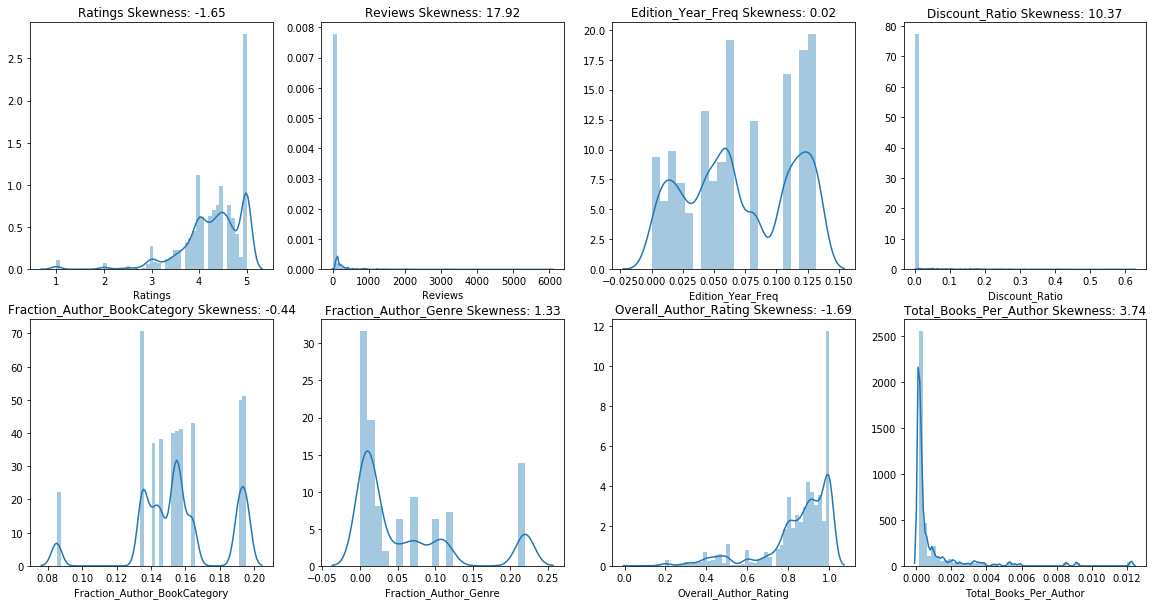

In [980]:
figs, axes = plt.subplots(2,4, figsize=(20,10))
for col, ax in zip(num_columns, axes.flat):
    sns.distplot(df3[col], ax=ax)
    ax.set_title("{} Skewness: {}".format(col,round(df3[col].skew(),2)))
plt.show()

In [999]:
df3['Reviews'] = np.log(df3['Reviews'])
df3['Discount_Ratio'] = np.power(df3['Discount_Ratio'],1/4)
df3['Total_Books_Per_Author'] = np.log(df3['Total_Books_Per_Author'])

### Modelling 

In [1000]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingRegressor

In [1001]:
train = df3[df3['split_source'] == 0]
test = df3[df3['split_source'] == 1]

In [1002]:
x_train = train.drop(['split_source','Price'], axis=1)
y_train = np.log(train['Price'])
x_test = test.drop(['split_source','Price'], axis=1)

In [1003]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)

x_train shape (5694, 50)
y_train shape (5694,)
x_test shape (1560, 50)


In [865]:
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [1004]:
rs = RobustScaler()
x_train_scaled = pd.DataFrame(rs.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(rs.transform(x_test), columns=x_test.columns)

In [1005]:
X_df = sm.add_constant(x_train_scaled)
# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
# View results
vif

/Users/sshankar7/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/sshankar7/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sshankar7/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,const,0.000000
1,Ratings,1.333179
2,Reviews,1.203284
3,Edition_Year_Freq,1.098683
4,Discount_Ratio,1.069268
...,...,...
46,BookCategory_Romance,inf
47,BookCategory_Sports,inf
48,Book_Type_Mass Market Paperback,1.268815
49,Book_Type_Others,1.190698


In [1006]:
# Keeping VIF less than 5
features_list = list(vif[vif['VIF'] < 5]['variables'])[1:]
print(len(features_list))
print(features_list)

9
['Ratings', 'Reviews', 'Edition_Year_Freq', 'Discount_Ratio', 'Overall_Author_Rating', 'Total_Books_Per_Author', 'Book_Type_Mass Market Paperback', 'Book_Type_Others', 'Book_Type_Paperback']


In [1014]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train_scaled, y_train)
imp_features = pd.DataFrame({"Feature_Importance":rfr.feature_importances_, "Columns":x_train_scaled.columns})\
.sort_values('Feature_Importance',ascending=False)

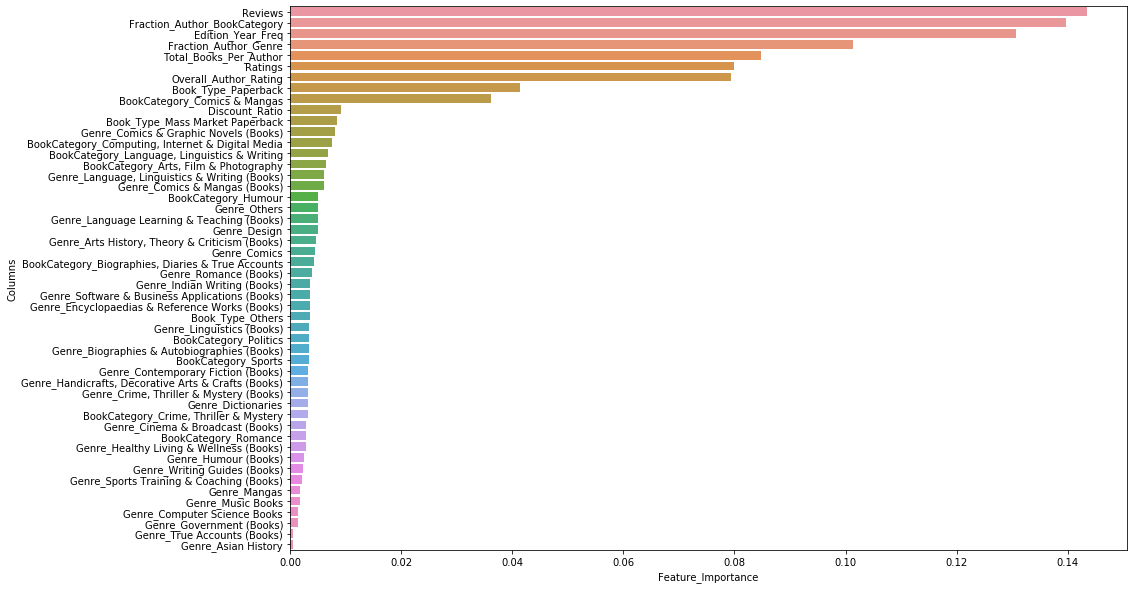

In [1016]:
plt.figure(figsize=(15,10))
sns.barplot(imp_features['Feature_Importance'], imp_features['Columns'])
plt.show()

In [1036]:
features_list = imp_features['Columns'][:10].to_list()

In [1037]:
features_list

['Reviews',
 'Fraction_Author_BookCategory',
 'Edition_Year_Freq',
 'Fraction_Author_Genre',
 'Total_Books_Per_Author',
 'Ratings',
 'Overall_Author_Rating',
 'Book_Type_Paperback',
 'BookCategory_Comics & Mangas',
 'Discount_Ratio']

In [1038]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
val_score = cross_val_score(rfr, x_train_scaled[features_list], y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
print(-val_score)
print(np.sqrt(np.mean(-val_score)))

[0.3730292  0.34393124 0.36757839 0.39362    0.44459103 0.36884004
 0.42685826 0.45189306 0.37944595 0.45458585]
0.6328011560440475


In [1039]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred = rfr.fit(x_train_scaled[features_list], y_train).predict(x_test_scaled[features_list])
y_pred = np.exp(y_pred)
print(y_pred)

[459.29109928 663.75483057 282.55480642 ... 452.69460932 358.54702014
 471.65538432]


In [1040]:
submission = pd.DataFrame({"Price": y_pred})
submission.to_excel('sub_rfr_v2.xlsx', index=False) # 34 Rank - 0.743898

### AutoML

In [1045]:
from tpot import TPOTRegressor
from xgboost import XGBRegressor

In [1041]:
pipeline_optimizer = TPOTRegressor(generations=10, population_size=100, random_state = 42, 
                                   n_jobs=-1, scoring='neg_mean_squared_error', verbosity=2)

In [1042]:
pipeline_optimizer.fit(x_train_scaled[features_list], y_train)

Generation 1 - Current best internal CV score: -0.3931087527719484
Generation 2 - Current best internal CV score: -0.39237925473212565
Generation 3 - Current best internal CV score: -0.38520769554522827
Generation 4 - Current best internal CV score: -0.3850451384161554
Generation 5 - Current best internal CV score: -0.3850451384161554
Generation 6 - Current best internal CV score: -0.3850451384161554
Generation 7 - Current best internal CV score: -0.3848241532285903
Generation 8 - Current best internal CV score: -0.3848241532285903
Generation 9 - Current best internal CV score: -0.3825728826738013
Generation 10 - Current best internal CV score: -0.3820115414326228

Best pipeline: ExtraTreesRegressor(XGBRegressor(VarianceThreshold(input_matrix, threshold=0.0005), learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, nthread=1, objective=reg:squarederror, subsample=1.0), bootstrap=False, max_features=0.35000000000000003, min_samples_leaf=2, min_samples_split=14, n_estimat

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=10,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=-1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=42, scoring='neg_mean_squared_error', subsample=1.0,
              template=None, use_dask=False, verbosity=2, warm_start=False)

In [1046]:
xgbr = XGBRegressor(learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, nthread=1, 
                    objective='reg:squarederror', subsample=1.0)
y_pred = gbr.fit(x_train_scaled[features_list], y_train).predict(x_test_scaled[features_list])
y_pred = np.exp(y_pred)
print(y_pred)

[265.30106214 804.82716435 256.95514889 ... 406.5990273  367.670364
 429.88396281]


In [1048]:
xgbr = XGBRegressor(learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, nthread=1, 
                    objective='reg:squarederror', subsample=1.0, random_state=42)
y_pred = gbr.fit(x_train_scaled[features_list], y_train).predict(x_test_scaled[features_list])
y_pred = np.exp(y_pred)
print(y_pred)

[265.30106214 804.82716435 256.95514889 ... 406.5990273  367.670364
 429.88396281]


In [1047]:
submission = pd.DataFrame({"Price": y_pred})
submission.to_excel('sub_xgbr_v1.xlsx', index=False) # 0.749766

In [894]:
gbr = GradientBoostingRegressor(alpha=0.8, learning_rate=0.1, loss='ls', max_depth=5, 
                                max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=14, 
                                n_estimators=100, subsample=0.9500000000000001, random_state=42)

In [895]:
y_pred = gbr.fit(x_train_scaled[features_list], y_train).predict(x_test_scaled[features_list])
y_pred = np.exp(y_pred)
print(y_pred)

[364.83256171 496.76110766 332.63780988 ... 362.23509734 393.36040333
 418.22326427]


In [896]:
submission = pd.DataFrame({"Price": y_pred})
submission.to_excel('sub_gbr_v5.xlsx', index=False)

In [886]:
gbr = GradientBoostingRegressor(random_state=42)

param_dist = dict(n_estimators=[100, 125, 200, 300],
                  max_depth=[4,6,8,10],
                  alpha=[0.5,0.75,0.8,0.9],
                  min_samples_split=[2,3,4,5],
                  min_samples_leaf=[6,8,10,12])

rand = RandomizedSearchCV(gbr, param_dist, cv=5,scoring='neg_mean_squared_error', verbose=2, random_state=42,
                          n_iter=30)

rand.fit(x_train_scaled[features_list], y_train)
print("-grid.best_score_ {}".format(-rand.best_score_))
print("grid.best_params_ {}".format(rand.best_params_))
print("grid.best_estimator_ {}".format(rand.best_estimator_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8, total=   0.4s
[CV] n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8, total=   0.3s
[CV] n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8 
[CV]  n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8, total=   0.3s
[CV] n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8 
[CV]  n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8, total=   0.3s
[CV] n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8 
[CV]  n_estimators=125, min_samples_split=5, min_samples_leaf=6, max_depth=4, alpha=0.8, total=   0.4s
[CV] n_estimators=125, min_samples_split=3, min_samples_leaf=10, max_depth=6, alpha=0.75 
[CV]  n_estimators=125, min_samples_split=3, min_samples_leaf=10, max_depth=6, alpha=0.75, total=   0.5s
[CV] n_estimators=125, min_samples_split=3, min_samples_leaf=10, max_depth=6, alpha=0.75 
[CV]  n_estimators=125, min_samples_spl

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.8min finished


-grid.best_score_ 0.4418156201870968
grid.best_params_ {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 6, 'alpha': 0.5}
grid.best_estimator_ GradientBoostingRegressor(alpha=0.5, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [887]:
gbr = GradientBoostingRegressor(alpha=0.5, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
val_score = cross_val_score(gbr, x_train_scaled[features_list], y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
print(-val_score)
print(np.sqrt(np.mean(-val_score)))

[0.40105313 0.4370864  0.42272035 0.48859999 0.45963389]
0.6646944778943352


### Irregularity in the data

In [695]:
df[df['Author'] == "A B de Villiers"]

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,split_source,Book_Type,Edition_Date,Edition_Desc,Fraction_Author_BookCategory
74,AB de Villiers - The Autobiography,A B de Villiers,"Paperback,– 6 Sep 2016",4.6,234,The Autobiography of One of the World's Finest...,Biographies & Autobiographies (Books),Sports,334.0,0,Paperback,6 Sep 2016,None,0.078748
660,AB de Villiers - The Autobiography,A B de Villiers,"Paperback,– 6 Sep 2016",4.6,234,The Autobiography of One of the World's Finest...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",NaN,1,Paperback,6 Sep 2016,None,0.093882


In [694]:
df.groupby(["BookCategory","Author"])['Reviews'].sum().reset_index(name="sum").sort_values(by=['Author'] )

,BookCategory,Author,sum
1949,"Computing, Internet & Digital Media","0, Butterfield, Ngondi, Kerr",4
3458,"Language, Linguistics & Writing","0, Jonathan Law",2
3459,"Language, Linguistics & Writing","0, Jonathan Law, Richard Rennie",29
3460,"Language, Linguistics & Writing","0, Kerr, Wright",4
3461,"Language, Linguistics & Writing","0, Rennie, Law",12
3462,"Language, Linguistics & Writing","0, Speake",3
486,"Arts, Film & Photography",3DTotal Publishing,2
1950,"Computing, Internet & Digital Media","3DTotal Team, Derek Stenning, Charlie Bowater",2
487,"Arts, Film & Photography","3DTotal Team, Derek Stenning, Charlie Bowater",2
4743,Sports,A B de Villiers,234


In [680]:
df.Title.nunique()

6787

In [697]:
df.duplicated().sum()

8

In [685]:
test[test['Title'] == "The Five Greatest Warriors (Jack West Series)"]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,split_source
587,The Five Greatest Warriors (Jack West Series),Matthew Reilly,"Paperback,– 25 Nov 2010",4.4 out of 5 stars,12 customer reviews,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure,1
1316,The Five Greatest Warriors (Jack West Series),Matthew Reilly,"Paperback,– 25 Nov 2010",4.4 out of 5 stars,12 customer reviews,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure,1
1432,The Five Greatest Warriors (Jack West Series),Matthew Reilly,"Paperback,– 25 Nov 2010",4.4 out of 5 stars,12 customer reviews,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),"Crime, Thriller & Mystery",1


In [683]:
df[df.Title == "The Five Greatest Warriors (Jack West Series)"]

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,split_source,Book_Type,Edition_Date,Edition_Desc,Fraction_Author_BookCategory
587,The Five Greatest Warriors (Jack West Series),Matthew Reilly,"Paperback,– 25 Nov 2010",4.4,12,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure,NaN,1,Paperback,25 Nov 2010,None,0.132872
1316,The Five Greatest Warriors (Jack West Series),Matthew Reilly,"Paperback,– 25 Nov 2010",4.4,12,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure,NaN,1,Paperback,25 Nov 2010,None,0.132872
1432,The Five Greatest Warriors (Jack West Series),Matthew Reilly,"Paperback,– 25 Nov 2010",4.4,12,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),"Crime, Thriller & Mystery",NaN,1,Paperback,25 Nov 2010,None,0.112607


In [676]:
df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,split_source,Book_Type,Edition_Date,Edition_Desc,Fraction_Author_BookCategory
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0,Paperback,10 Mar 2016,None,0.132872
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0,Paperback,7 Nov 2012,None,0.093882
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,0,Paperback,25 Feb 1982,None,0.085930
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0,Paperback,5 Oct 2017,None,0.112607
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,0,Hardcover,10 Oct 2006,None,0.081826


In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 14 columns):
Title                           7797 non-null object
Author                          7797 non-null object
Edition                         7797 non-null object
Ratings                         7797 non-null float64
Reviews                         7797 non-null int64
Synopsis                        7797 non-null object
Genre                           7797 non-null object
BookCategory                    7797 non-null object
Price                           6237 non-null float64
split_source                    7797 non-null int64
Book_Type                       7797 non-null object
Edition_Date                    7767 non-null object
Edition_Desc                    989 non-null object
Fraction_Author_BookCategory    7797 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.0+ MB


In [578]:
pd.set_option("display.max_rows",5500)
df.groupby(['Genre'])['Author'].value_counts().reset_index(name='Counts').sort_values('Counts',ascending=False)

,Genre,Author,Counts
2016,"Crime, Thriller & Mystery (Books)",Agatha Christie,53
3686,Mangas,Albert Uderzo,41
1536,Comics & Mangas (Books),Herge,40
3559,"Language, Linguistics & Writing (Books)",Ladybird,39
4,Action & Adventure (Books),Clive Cussler,30
1516,Comics & Graphic Novels (Books),Bill Watterson,28
5,Action & Adventure (Books),Wilbur Smith,25
4335,Romance (Books),Nora Roberts,23
6,Action & Adventure (Books),George R.R. Martin,21
7,Action & Adventure (Books),Louis L'Amour,21


In [575]:
df.Author.nunique()

4372

In [91]:
df['BookType'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada),Paperback', 'Product Bundle', 'Library Binding',
       '(German),Paperback', 'Leather Bound', '(French),Paperback',
       '(Spanish),Paperback', '(Chinese),Paperback'], dtype=object)

In [408]:
mylist = ['ab','cd']

### References:
[1] https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python